In [161]:
import sys
sys.dont_write_bytecode = True
%reload_ext autoreload
%autoreload 2
import Results as results

# LLM names
llm_models = ['ChatGPT 5.1', 'Claude Opus 4.5', 'Gemini 3 Pro']

In [162]:
# Load data
df = results.load_data(llm_models)

# Quick check (3 LLMs * 90 files * 18 smells): 4860
print(f"Total data points loaded: {len(df)}")
df.tail()

Total data points loaded: 4860


,LLM,Category,File,Rule_ID,Actual,Detected,Justification
4855,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N1.2,True,False,"No class, table, attribute, or use case names ..."
4856,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N3.1,True,True,"On the Database Design diagrams (Pages 29-32),..."
4857,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N3.2,False,False,Attributes and columns consistently start with...
4858,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N3.3,False,False,"Database table names are singular (e.g., 'Isik..."
4859,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N4.1,False,False,"No prefixes indicating type (like 'tbl_', 'str..."


#### Overall Results (All Data)

,Accuracy,Precision,Recall,F1-Score,Sample Size,LLM
0,0.930864,0.910569,0.525822,0.666667,1620,ChatGPT 5.1
1,0.912346,0.689840,0.605634,0.645000,1620,Claude Opus 4.5
2,0.938889,0.820225,0.685446,0.746803,1620,Gemini 3 Pro


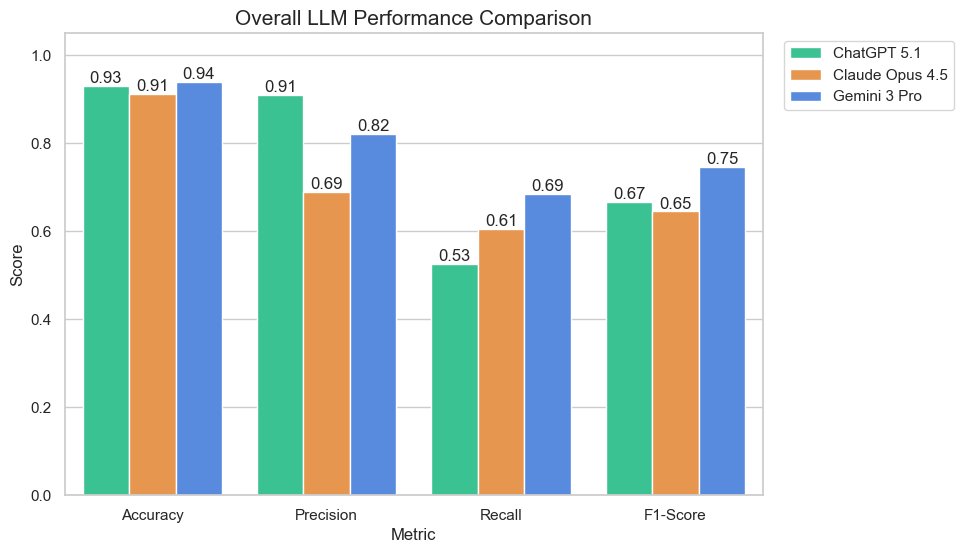

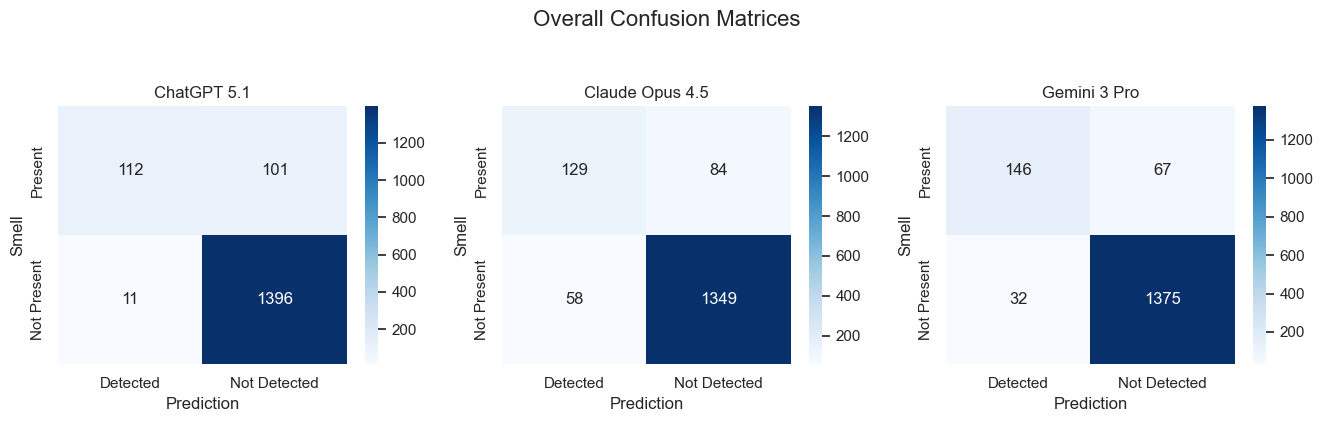

In [163]:
# 1. Calculate Metrics
overall_metrics = results.calculate_metrics(df, grouping_col='LLM')
display(overall_metrics)

# 2. Bar Chart Comparison
results.plot_benchmark_bars(overall_metrics, "Overall LLM Performance Comparison")

# 3. Confusion Matrices
results.plot_confusion_matrix_per_llm(df, title_prefix="Overall")

#### Aggregated Data (Real World _vs._ Synthetics)

 
--- Analysis for Real World (Oppejoud + Yliopilased) ---
 


,Accuracy,Precision,Recall,F1-Score,Sample Size,LLM
0,0.890432,0.900000,0.533333,0.669767,648,ChatGPT 5.1
1,0.870370,0.721739,0.614815,0.664000,648,Claude Opus 4.5
2,0.921296,0.868421,0.733333,0.795181,648,Gemini 3 Pro


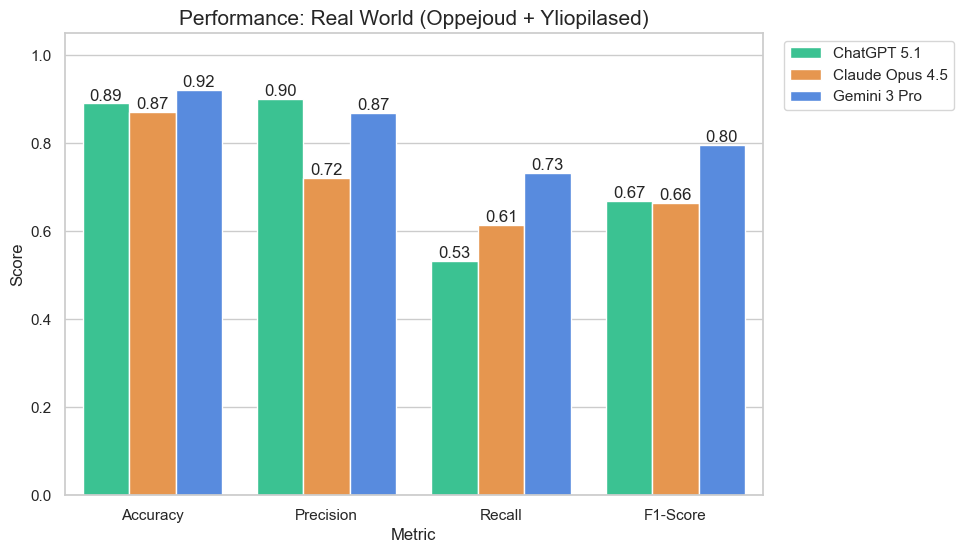

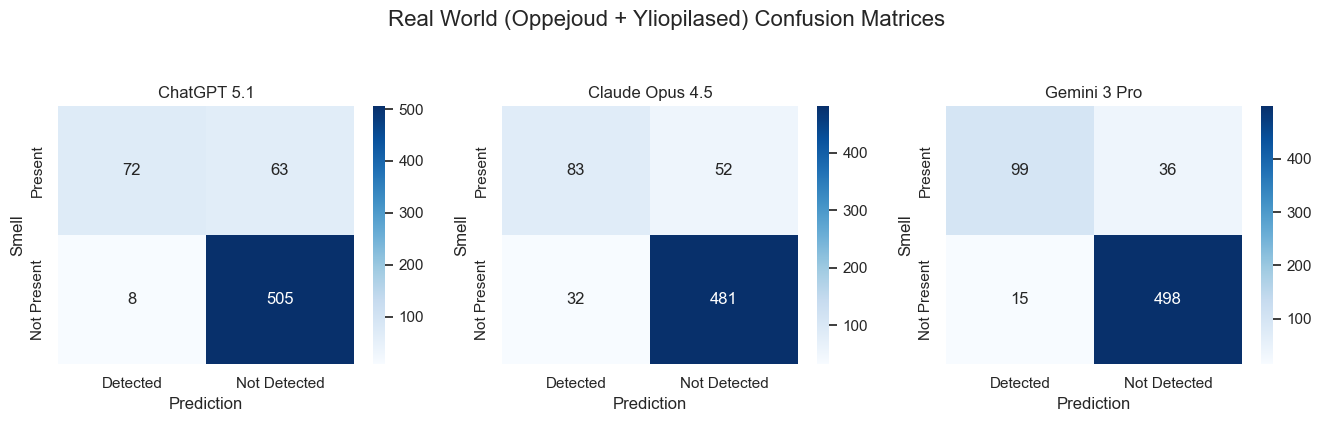

 
--- Analysis for Synthetics (Single + Multi) ---
 


,Accuracy,Precision,Recall,F1-Score,Sample Size,LLM
0,0.957819,0.930233,0.512821,0.661157,972,ChatGPT 5.1
1,0.940329,0.638889,0.589744,0.613333,972,Claude Opus 4.5
2,0.950617,0.734375,0.602564,0.661972,972,Gemini 3 Pro


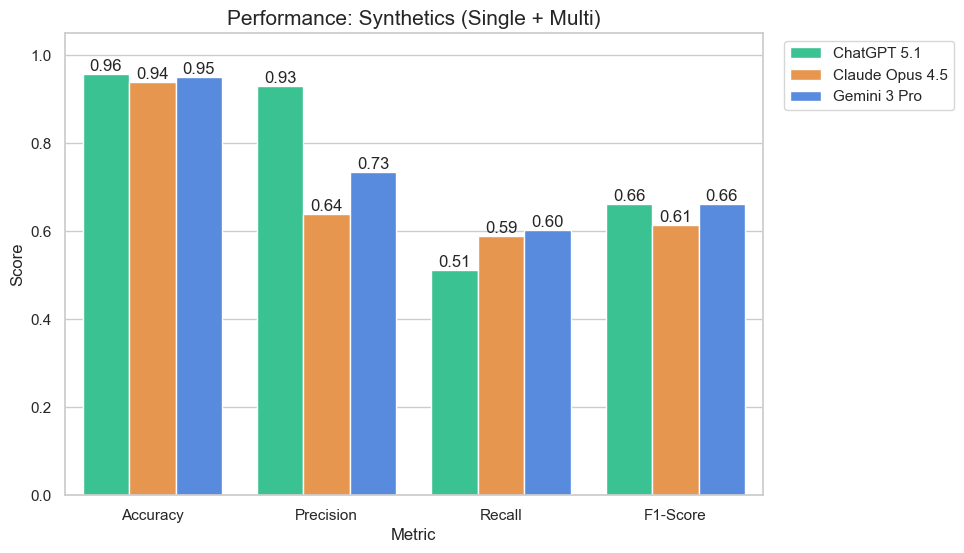

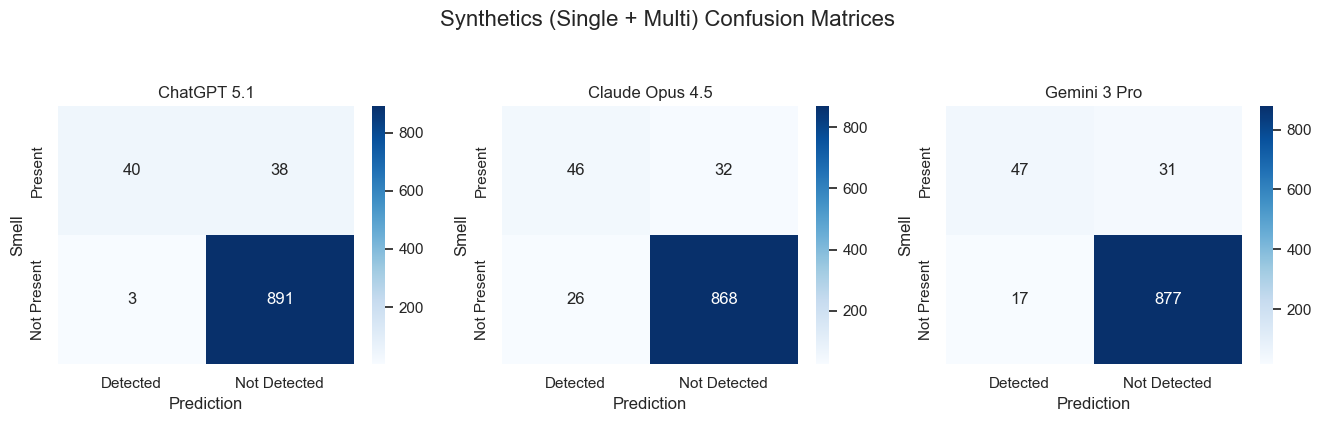

In [164]:
# Custom groups we want to analyze
custom_aggregates = {
    "Real World (Oppejoud + Yliopilased)": ["Oppejoud", "Yliopilased"],
    "Synthetics (Single + Multi)": ["Synthetic -> Single", "Synthetic -> Multi"]
}

results.plot_custom_aggregates(df, custom_aggregates)

#### Results per Category (Oppejoud, Synthetic, etc.)

 
--- Analysis for Oppejoud ---
 


,Accuracy,Precision,Recall,F1-Score,Sample Size,LLM
0,0.922222,0.928571,0.684211,0.787879,90,ChatGPT 5.1
1,0.922222,0.833333,0.789474,0.810811,90,Claude Opus 4.5
2,0.966667,0.944444,0.894737,0.918919,90,Gemini 3 Pro


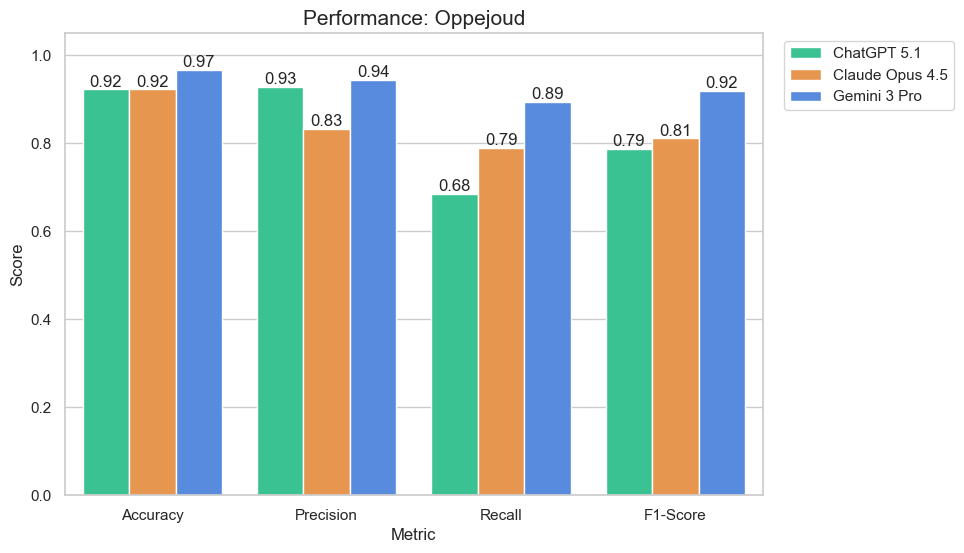

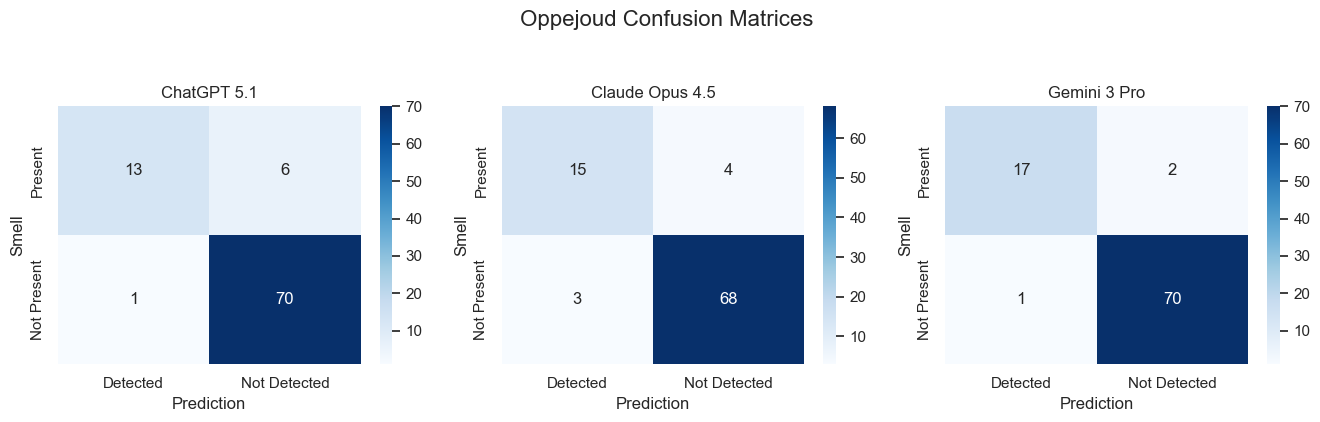

 
--- Analysis for Yliopilased ---
 


,Accuracy,Precision,Recall,F1-Score,Sample Size,LLM
0,0.885305,0.893939,0.508621,0.648352,558,ChatGPT 5.1
1,0.862007,0.701031,0.586207,0.638498,558,Claude Opus 4.5
2,0.913978,0.854167,0.706897,0.773585,558,Gemini 3 Pro


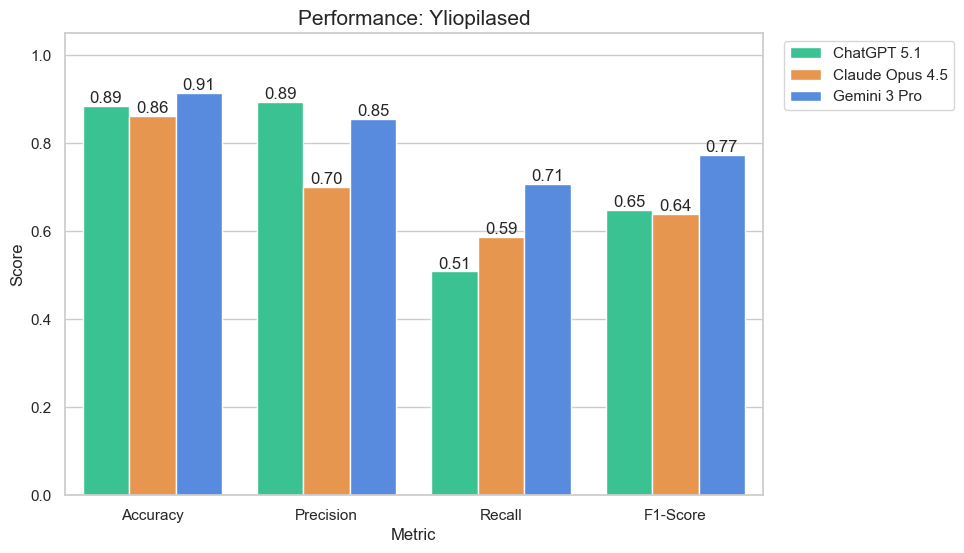

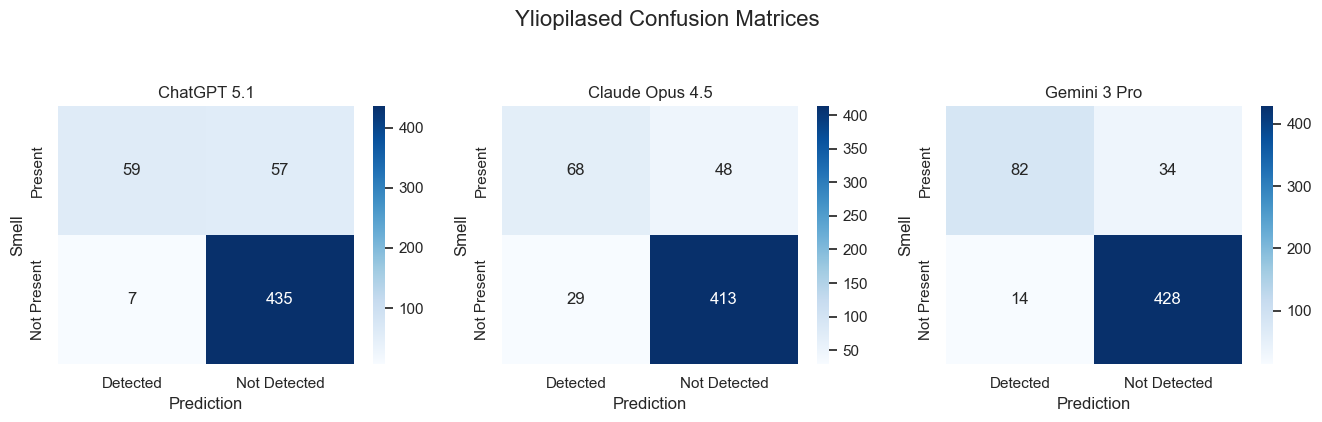

 
--- Analysis for Synthetic -> Single ---
 


,Accuracy,Precision,Recall,F1-Score,Sample Size,LLM
0,0.961279,0.812500,0.393939,0.530612,594,ChatGPT 5.1
1,0.942761,0.484848,0.484848,0.484848,594,Claude Opus 4.5
2,0.951178,0.566667,0.515152,0.539683,594,Gemini 3 Pro


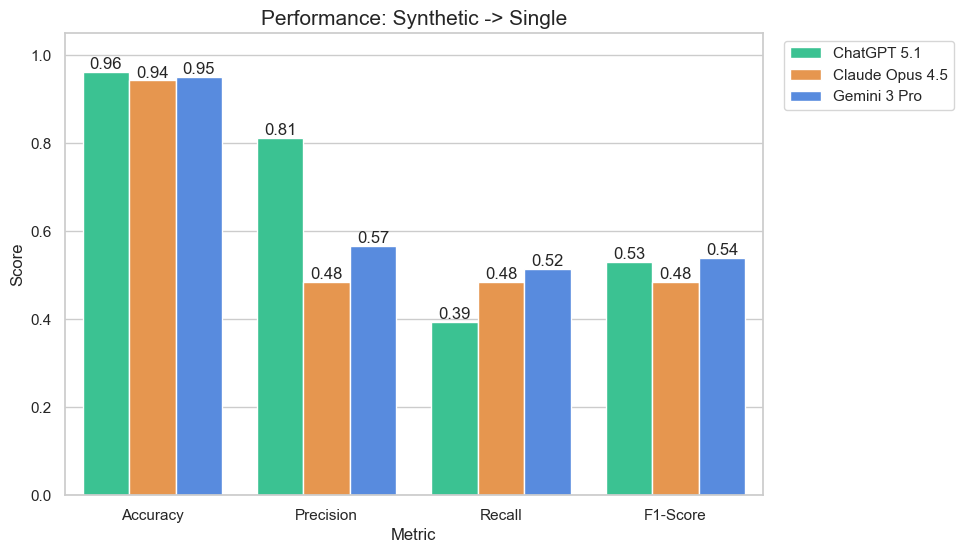

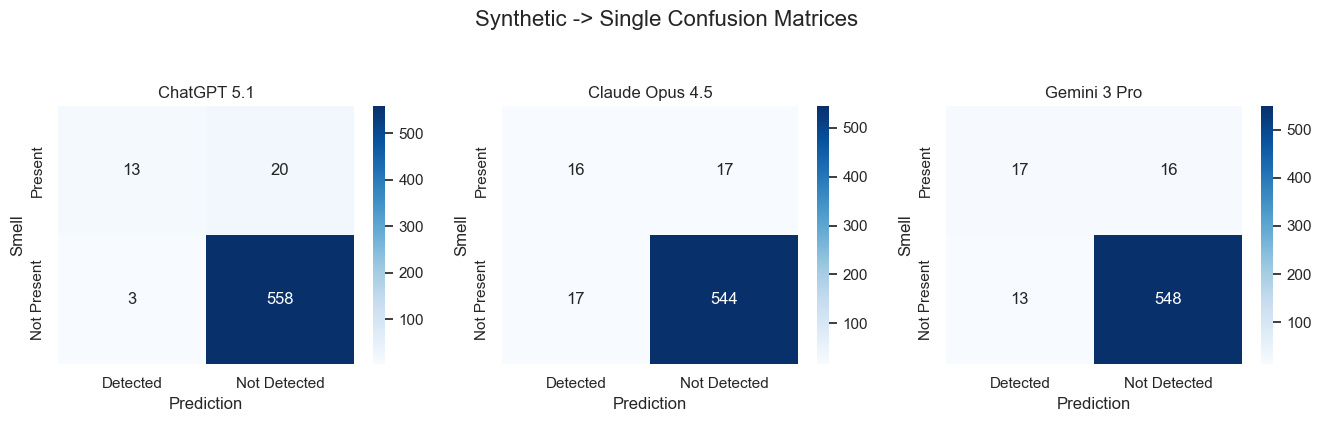

 
--- Analysis for Synthetic -> Multi ---
 


,Accuracy,Precision,Recall,F1-Score,Sample Size,LLM
0,0.952381,1.000000,0.600000,0.750000,378,ChatGPT 5.1
1,0.936508,0.769231,0.666667,0.714286,378,Claude Opus 4.5
2,0.949735,0.882353,0.666667,0.759494,378,Gemini 3 Pro


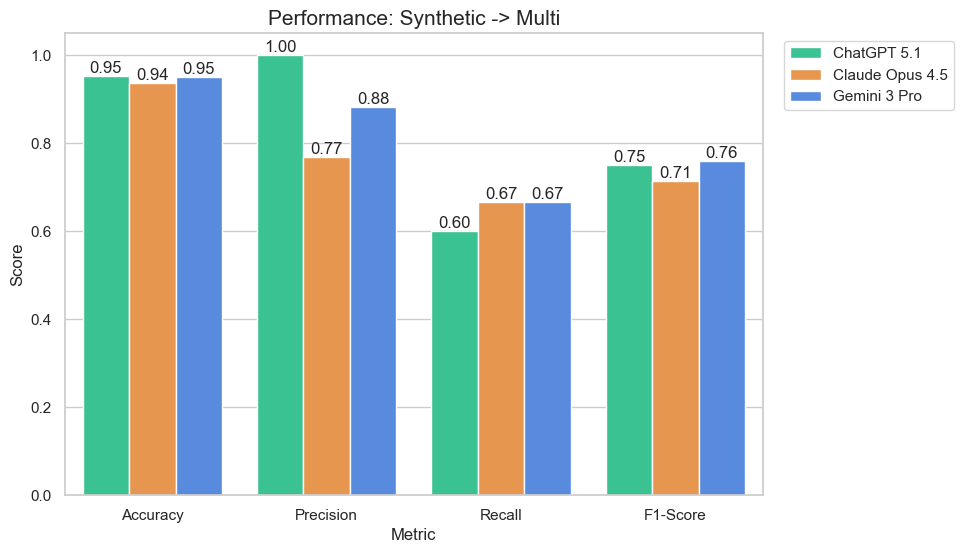

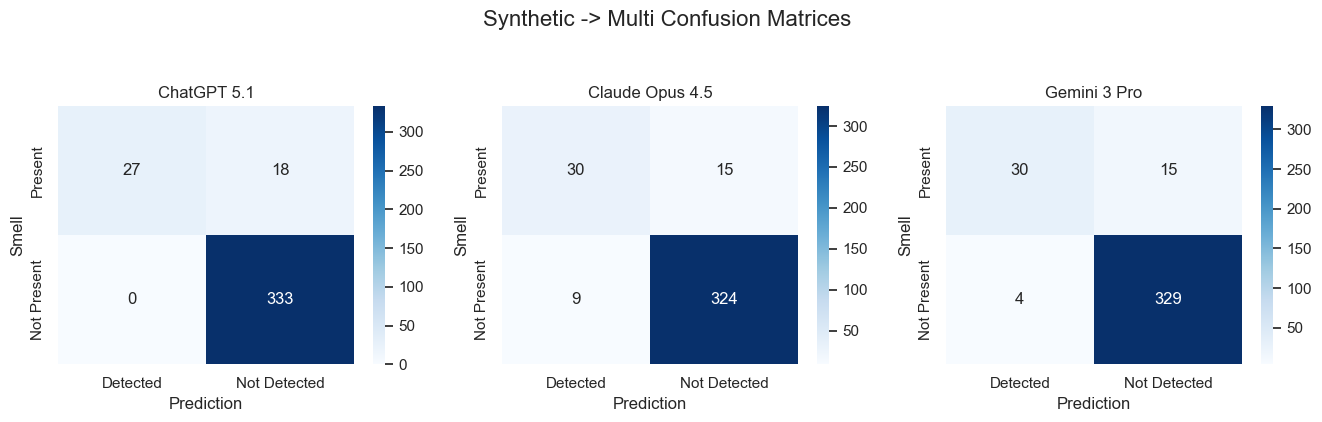

In [165]:
# The exact order of plots per category
target_order = [
    "Oppejoud",
    "Yliopilased",
    "Synthetic -> Single",
    "Synthetic -> Multi"
]

results.plot_per_category(df, target_order)

---

#### "Hardest Smells" Analysis
* Below graph identifies which of the 18 rules were the hardest to detect. Shown on generated Heatmap.

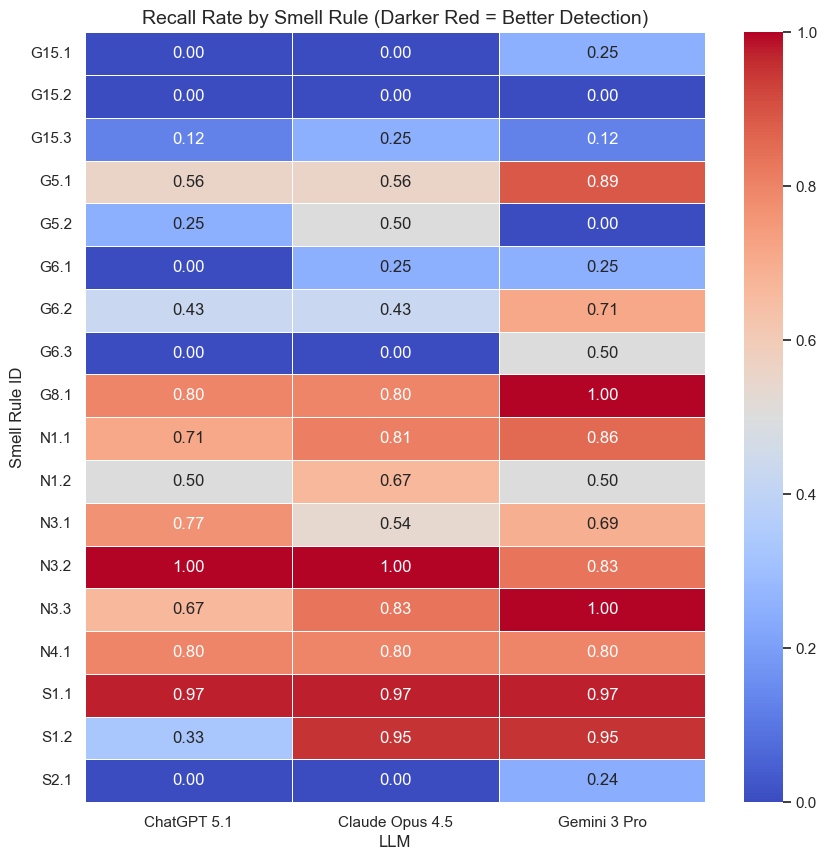

In [166]:
results.plot_hardest_smells(df)

#### "Hallucination" Analysis
* Below graph shows how often an LLM claimed a smell existed when it did not (False Positives) for. Lower is better.

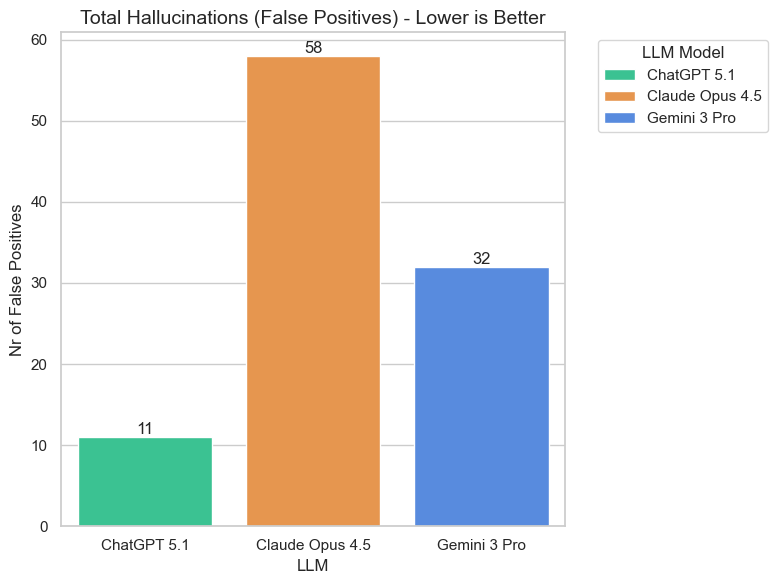

In [167]:
results.plot_hallucinations(df)

#### The "Paranoia" Heatmap
* Below graph analyzes if an LLM is "paranoid" about specific rules. For example, it might correctly detect "God Class" (S1.1), but it might also be screaming "God Class!" on files that are actually perfectly fine.

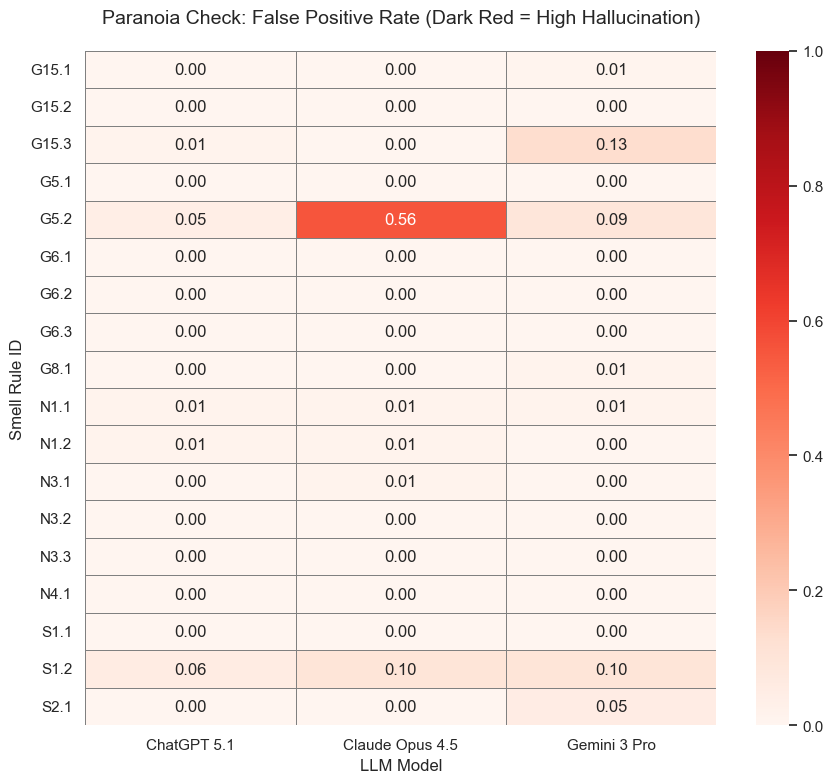

In [168]:
results.plot_paranoia_heatmap(df)

---

#### Strategy Map (Precision _vs._ Recall)

The graphs below presents the operational trade-offs of the models as a Strategy Map:


*   **Bottom Right** (High Precision / Low Recall):
    Indicates a **Strict** Classification Threshold. The model exhibits high reliability in its positive predictions but suffers from a high False Negative rate (missed detections).

*   **Top Left** (Low Precision / High Recall):
    Indicates a **Sensitive** Classification Threshold. The model is highly effective at identifying potential issues but suffers from a high False Positive rate.

*   **Top Right** (High Precision / High Recall):
    Indicates **High Performance Convergence**, representing the optimal balance that maximizes the F1-score.

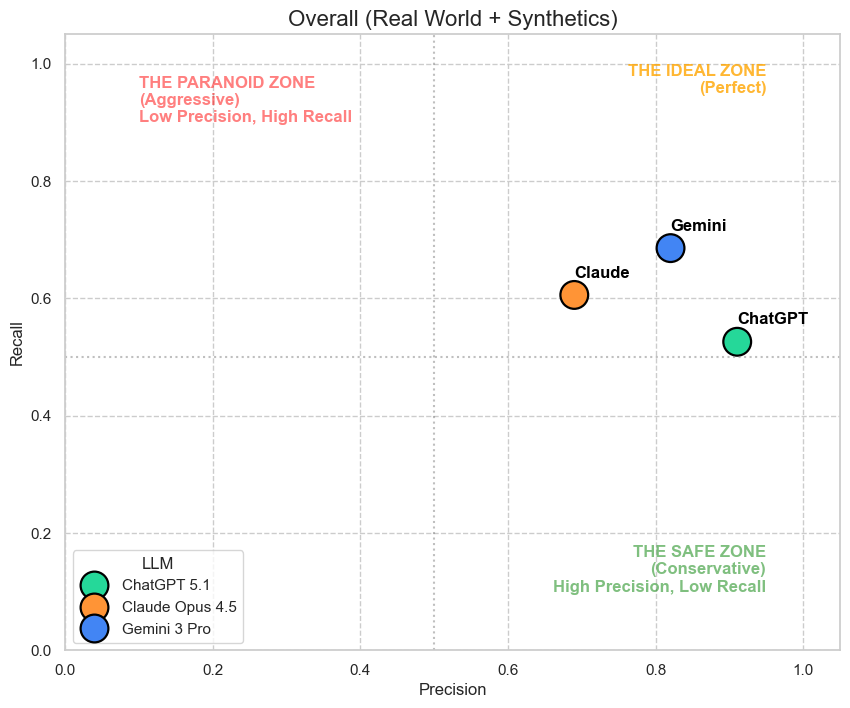

In [169]:
results.plot_strategy_map(df, {"Overall (Real World + Synthetics)": df['Category'].unique()})

#### Analysis for Overall (Real World + Synthetics)

The overall performance across both real-world and synthetic datasets (n=1620) is summarized below:

*   **Gemini 3 Pro**
    *   **Metrics:** Highest F1-Score (**0.747**) and Recall (**0.685**); Precision (**0.820**).
    *   **Observation:** Gemini achieved the optimal balance between Precision and Recall. It proved to be the best tool for detecting model smells. While it generates a manageable number of false positives, its superior Recall (detection rate) allows for a more comprehensive identification of potential model smells.
<br>

*   **ChatGPT 5.1**
    *   **Metrics:** Highest Precision (**0.911**); Lowest Recall (**0.526**).
    *   **Observation:** This model prioritized High Precision at the expense of Recall. ChatGPT exhibited a "risk-averse" behavior; it rarely hallucinated non-existent smells. However, its utility was limited by a conservative classification threshold, causing it to miss a portion of the actual issues.
<br>

*   **Claude Opus 4.5**
    *   **Metrics:** Lowest F1-Score (**0.645**) and Precision (**0.690**).
    *   **Observation:** Claude occupied a suboptimal position in the strategy map. It detected fewer smells than Gemini while maintaining lower precision than ChatGPT, resulting in a performance profile that did not maximize either coverage.

---

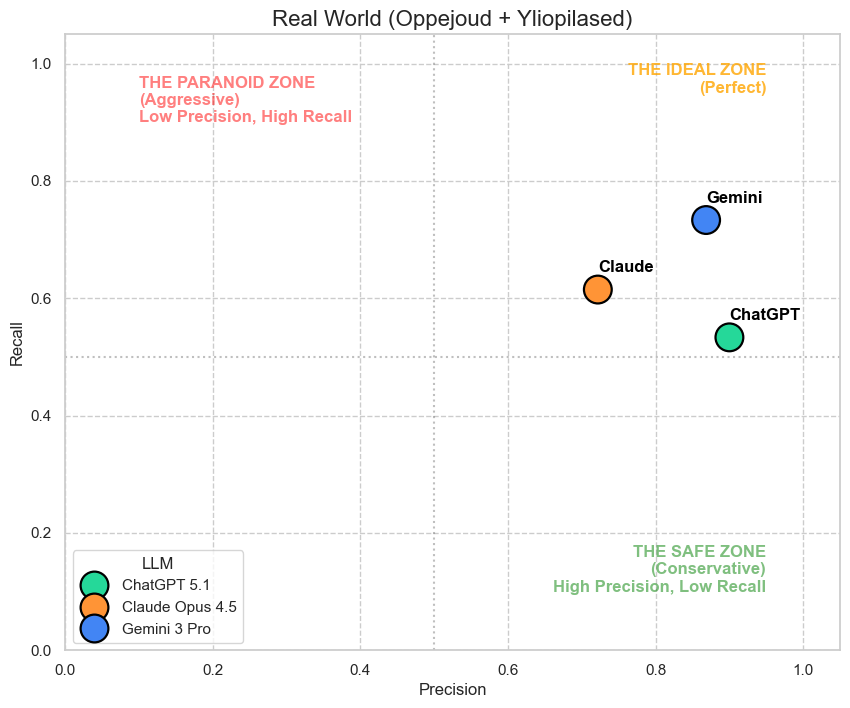

In [170]:
results.plot_strategy_map(df, {"Real World (Oppejoud + Yliopilased)": ["Oppejoud", "Yliopilased"]})

#### Analysis for Real World (Oppejoud + Yliopilased)

The performance metrics on the real-world dataset (n=648) is summarized below:

*   **Gemini 3 Pro**
    *   **Metrics:** Highest F1-Score (**0.795**) and Recall (**0.733**).
    *   **Observation:** It identified the highest number of actual model smells among the tested models, demonstrating the highest effective coverage.
<br>

*   **ChatGPT 5.1**
    *   **Metrics:** Highest Precision (**0.900**); Lowest Recall (**0.533**).
    *   **Observation:** Achieved a significantly low rate of false positives, though it recorded the lowest detection rate (Recall) of the three models.
<br>

*   **Claude Opus 4.5**
    *   **Metrics:** Recall (**0.615**); Lowest Precision (**0.722**).
    *   **Observation:** Presented a middle ground in terms of Recall (ranking between Gemini and ChatGPT) but recorded the lowest Precision in this test set.

---

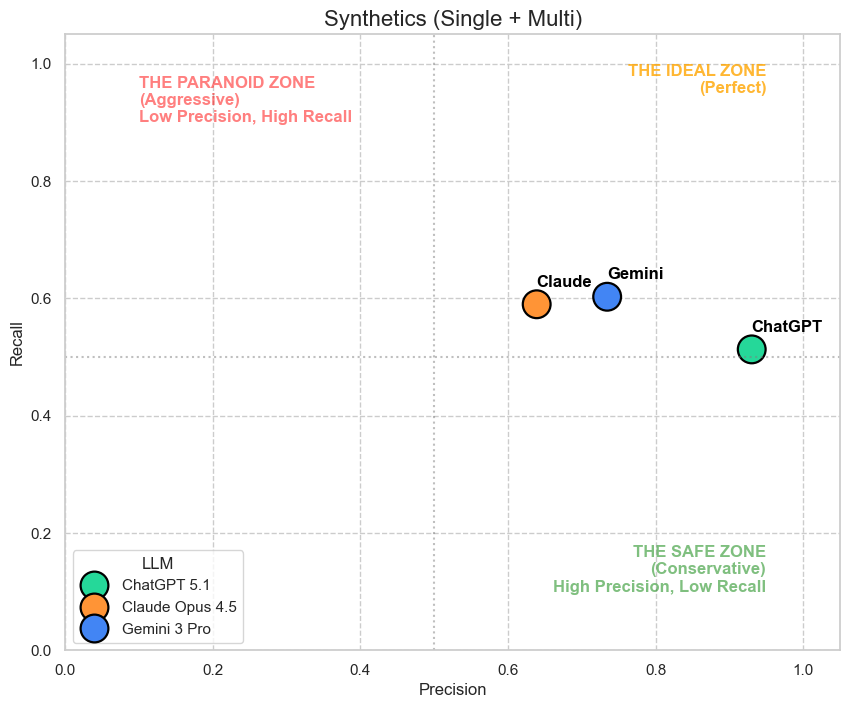

In [171]:
results.plot_strategy_map(df, {"Synthetics (Single + Multi)": ["Synthetic -> Single", "Synthetic -> Multi"]})

#### Analysis for Synthetics (Single + Multi)

The performance metrics on the synthetic dataset (n=972) show a shift in model behavior compared to the real-world data:

*   **Gemini 3 Pro**
    *   **Metrics:** Highest Recall (**0.603**) and F1-Score (**0.662**).
    *   **Observation:** While it retained the lead, the performance gap in F1-Score between Gemini and ChatGPT converged significantly in this environment.
<br>

*   **ChatGPT 5.1**
    *   **Metrics:** Highest Precision (**0.930**); Lowest Recall (**0.513**).
    *   **Observation:** Achieved a notably high resistance to false positives even in this concentrated dataset, though its Recall remained low.
<br>

*   **Claude Opus 4.5**
    *   **Metrics:** Lowest Precision (**0.639**) and F1-Score (**0.613**).
    *   **Observation:** Its Recall (**0.590**) remained competitive with Gemini, but the low precision indicates a struggle with the artificial density of smells.